In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import warnings

from scipy.stats import skew
import seaborn as sns
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# import the test and train csv files as split by Devin:
diabetesTrain = pd.read_csv('../data/train_multi.csv')
diabetesTest = pd.read_csv('../data/test_multi.csv')

diabetesTrain['IsTrain'] = 1 
diabetesTest['IsTrain'] = 0

In [3]:
# concatenate Train and Test sets for preprocessing and data cleaning
dataset = pd.concat([diabetesTrain, diabetesTest], axis=0)
dataset.index = list(range(len(dataset)))

In [4]:
dataset.columns

Index([u'encounter_id', u'patient_nbr', u'race', u'gender', u'age', u'weight',
       u'admission_type_id', u'discharge_disposition_id',
       u'admission_source_id', u'time_in_hospital', u'payer_code',
       u'medical_specialty', u'num_lab_procedures', u'num_procedures',
       u'num_medications', u'number_outpatient', u'number_emergency',
       u'number_inpatient', u'diag_1', u'diag_2', u'diag_3',
       u'number_diagnoses', u'max_glu_serum', u'A1Cresult', u'metformin',
       u'repaglinide', u'nateglinide', u'chlorpropamide', u'glimepiride',
       u'acetohexamide', u'glipizide', u'glyburide', u'tolbutamide',
       u'pioglitazone', u'rosiglitazone', u'acarbose', u'miglitol',
       u'troglitazone', u'tolazamide', u'examide', u'citoglipton', u'insulin',
       u'glyburide.metformin', u'glipizide.metformin',
       u'glimepiride.pioglitazone', u'metformin.rosiglitazone',
       u'metformin.pioglitazone', u'change', u'diabetesMed', u'readmitted',
       u'IsTrain'],
      dtype='ob

In [5]:
dataset.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [6]:
pd.options.display.max_columns = 55
dataset.iloc[:10]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted,IsTrain
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,1
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,1
2,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,1
3,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,1
4,35754,82637451,Caucasian,Male,[50-60),NaN,2,1,2,3,NaN,NaN,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30,1
5,55842,84259809,Caucasian,Male,[60-70),NaN,3,1,2,4,NaN,NaN,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,1
6,63768,114882984,Caucasian,Male,[70-80),NaN,1,1,7,5,NaN,NaN,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30,1
7,15738,63555939,Caucasian,Female,[90-100),NaN,3,3,4,12,NaN,InternalMedicine,33,3,18,0,0,0,434,198,486,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,1
8,36900,77391171,AfricanAmerican,Male,[60-70),NaN,2,1,4,7,NaN,NaN,62,0,11,0,0,0,157,288,197,7,None,None,No,No,No,No,No,No,No,Up,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,<30,1
9,42570,77586282,Caucasian,Male,[80-90),NaN,1,6,7,10,NaN,Family/GeneralPractice,55,1,31,0,0,0,428,411,427,8,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO,1


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101766 entries, 0 to 101765
Data columns (total 51 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        99493 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      3197 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  61510 non-null object
medical_specialty           51817 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non

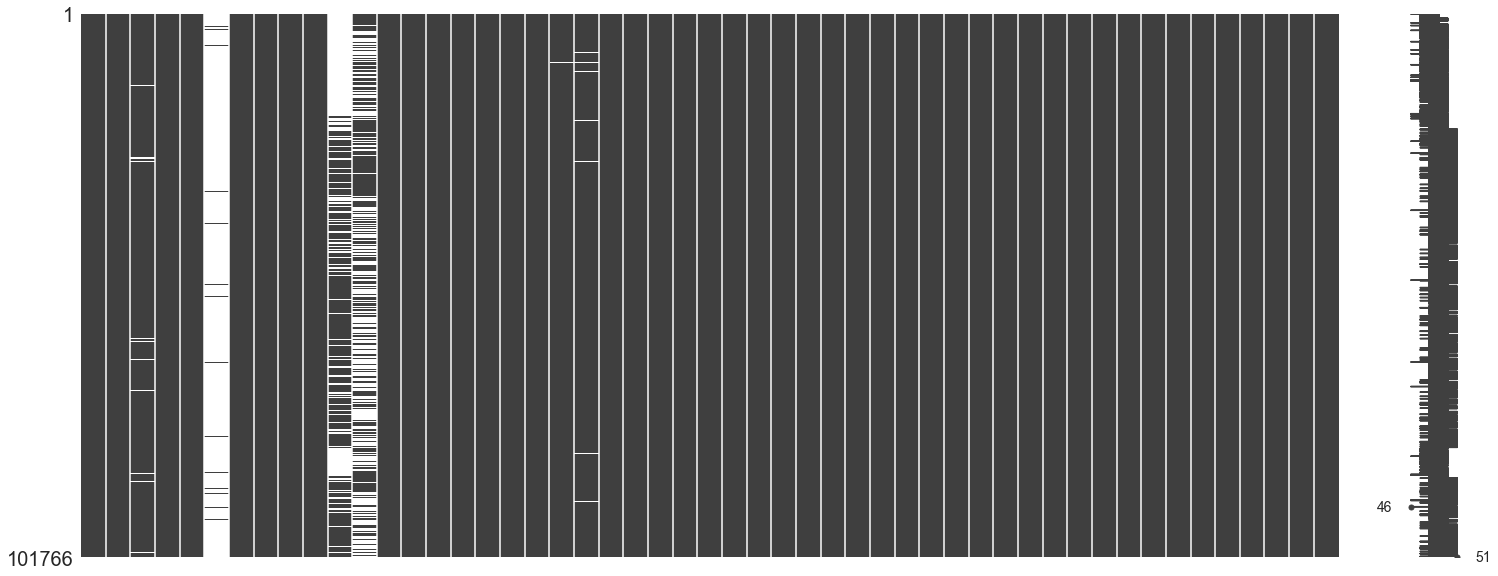

In [8]:
msno.matrix(dataset)

#### The dataset has 101766 rows. 49 Feature Colums, 1 Target Column, 1 Column to indicated if train or test set.

- Target Column: readmitted is of the type object

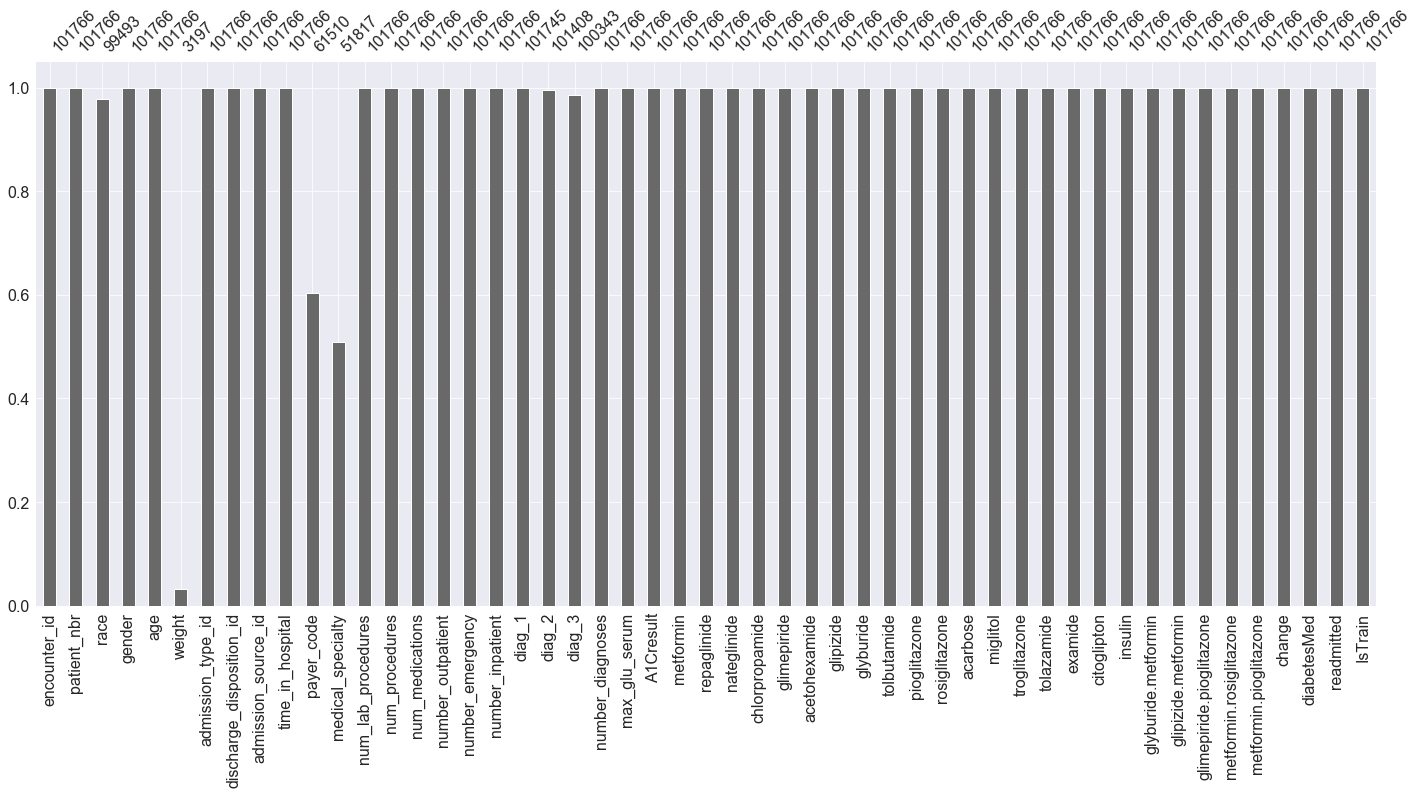

In [9]:
msno.bar(dataset)

In [11]:
dataset.shape

(101766, 51)

### Convert data to proper type

#### Set encounter id, patient number, admission type, discharge disposition id and admission source ID as string

In [12]:
cols_to_string = ['encounter_id', 
                  'patient_nbr', 
                  'admission_type_id', 
                  'discharge_disposition_id', 
                  'admission_source_id']
dataset[cols_to_string] = dataset[cols_to_string].astype(str) 

#### Age is divided into decades. Replace with ordinal categorical values for simplitcity.

In [13]:
dataset['age'].value_counts()

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

In [14]:
dataset['age'] = dataset['age'].replace(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', 
                                              '[60-70)', '[70-80)', '[80-90)', '[90-100)'], 
                                          [1,2,3,4,5,6,7,8,9,10])

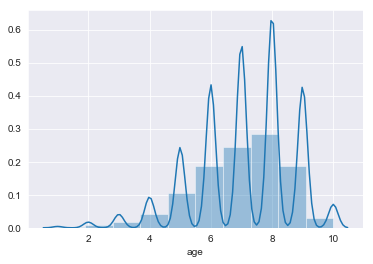

In [15]:
sns.distplot(dataset['age'], bins=10)

In [16]:
#### Weight is 97% NaN... drop
dataset.drop('weight',axis=1, inplace=True)

In [17]:
dataset.shape

(101766, 50)

In [18]:
#### Drop rows with unknown/invalid gender
dataset.drop(dataset[dataset['gender']=="Unknown/Invalid"].index,axis=0,inplace=True)

In [19]:
#### Drop rows with race is ?
dataset.drop(dataset[dataset['race']=="?"].index,axis=0,inplace=True)

In [20]:
dataset['medical_specialty'] = dataset['medical_specialty'].replace('?','unknown')

In [21]:
dataset['payer_code'] = dataset['payer_code'].replace(np.nan, 'None')

In [22]:
dataset['payer_code'].value_counts()

None    40255
MC      32439
HM       6274
SP       5007
BC       4655
MD       3532
CP       2531
UN       2448
CM       1937
OG       1033
PO        592
DM        549
CH        146
WC        135
OT         95
MP         79
SI         55
FR          1
Name: payer_code, dtype: int64

#### Drop columns with NaN values

In [23]:
dataset.dropna(subset=['diag_1'], inplace=True) 

In [24]:
dataset.dropna(subset=['diag_2'], inplace=True)

In [25]:
dataset.dropna(subset=['diag_3'], inplace=True) 

In [26]:
dataset.shape

(100241, 50)

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100241 entries, 1 to 101765
Data columns (total 50 columns):
encounter_id                100241 non-null object
patient_nbr                 100241 non-null object
race                        98052 non-null object
gender                      100241 non-null object
age                         100241 non-null int64
admission_type_id           100241 non-null object
discharge_disposition_id    100241 non-null object
admission_source_id         100241 non-null object
time_in_hospital            100241 non-null int64
payer_code                  100241 non-null object
medical_specialty           50761 non-null object
num_lab_procedures          100241 non-null int64
num_procedures              100241 non-null int64
num_medications             100241 non-null int64
number_outpatient           100241 non-null int64
number_emergency            100241 non-null int64
number_inpatient            100241 non-null int64
diag_1                      1002

In [31]:
dataset.medical_specialty.isna().value_counts()

False    50761
True     49480
Name: medical_specialty, dtype: int64